<a href="https://colab.research.google.com/github/Lenalex45/MachineLearningTD1/blob/main/TP4_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import os

# Remplacez par le chemin de votre dossier
image_folder_path = '/content/drive/My Drive/cats_and_dogs' 

# Liste tous les fichiers/dossiers dans le dossier d'images
for file_name in os.listdir(image_folder_path):
    print(file_name)

.DS_Store
test
train


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/cats_and_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary', shuffle=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/cats_and_dogs/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', shuffle=False )

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Charger ResNet50V2 pré-entraîné sur ImageNet, sans la dernière couche
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Créer un nouveau modèle en ajoutant une nouvelle dernière couche à ResNet50V2
model = Sequential()
model.add(base_model)  # Ajouter le modèle de base
model.add(Flatten())  # Aplatir la sortie du modèle de base
model.add(Dense(1, activation='sigmoid'))  # Ajouter la dernière couche pour la classification binaire

# Congeler les couches du modèle de base pour qu'elles ne soient pas entraînées
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
18/18 [==============================] - 34s 2s/step - loss: 2.3044 - accuracy: 0.7397 - val_loss: 0.3060 - val_accuracy: 0.9071
Epoch 2/10
18/18 [==============================] - 30s 2s/step - loss: 0.5119 - accuracy: 0.8977 - val_loss: 0.9712 - val_accuracy: 0.8714
Epoch 3/10
18/18 [==============================] - 28s 2s/step - loss: 0.2071 - accuracy: 0.9443 - val_loss: 0.6515 - val_accuracy: 0.9000
Epoch 4/10
18/18 [==============================] - 28s 2s/step - loss: 0.1616 - accuracy: 0.9695 - val_loss: 0.6217 - val_accuracy: 0.9000
Epoch 5/10
18/18 [==============================] - 29s 2s/step - loss: 0.0845 - accuracy: 0.9803 - val_loss: 0.5897 - val_accuracy: 0.9071
Epoch 6/10
18/18 [==============================] - 29s 2s/step - loss: 0.0599 - accuracy: 0.9767 - val_loss: 0.3527 - val_accuracy: 0.9143
Epoch 7/10
18/18 [==============================] - 32s 2s/step - loss: 0.0467 - accuracy: 0.9892 - val_loss: 0.3393 - val_accuracy: 0.9143
Epoch 8/10
18/18 [==

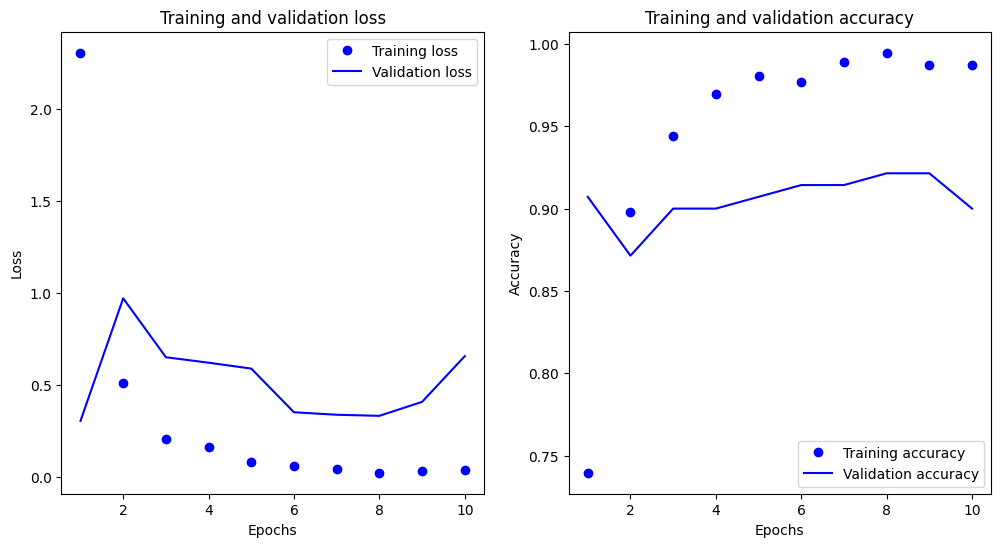

In [ ]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
history_dict = history.history

# Extraire les valeurs de perte et de précision
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Obtenir le nombre d'époques
epochs = range(1, len(loss_values) + 1)

# Tracer la perte
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la précision
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)  # Convertir les probabilités en étiquettes binaires

# Extraire les vraies étiquettes
y_true = validation_generator.labels

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

5/5 [==============================] - 7s 1s/step
[[56 14]
 [ 0 70]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        70
           1       0.83      1.00      0.91        70

    accuracy                           0.90       140
   macro avg       0.92      0.90      0.90       140
weighted avg       0.92      0.90      0.90       140

